In [1]:
!pip install seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv("orders_full.csv")


/tmp/ipython-input-3-1406399589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_d')


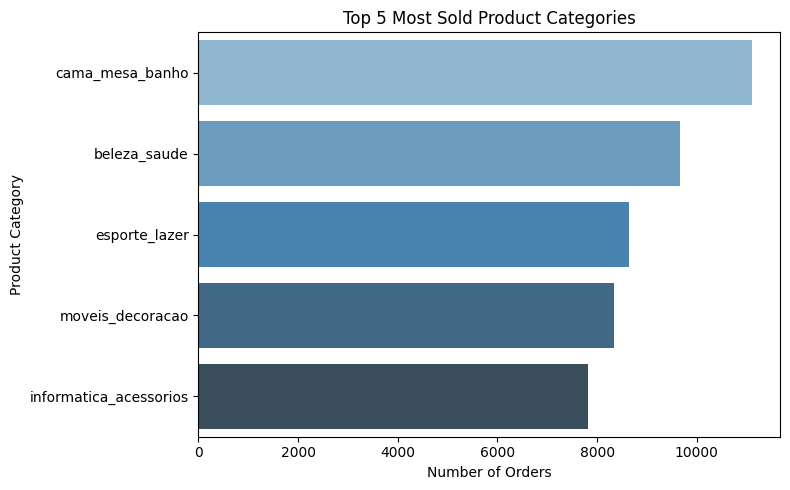

In [3]:
top_categories = df['product_category_name'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_d')
plt.title("Top 5 Most Sold Product Categories")
plt.xlabel("Number of Orders")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-2533937553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='Greens_d')


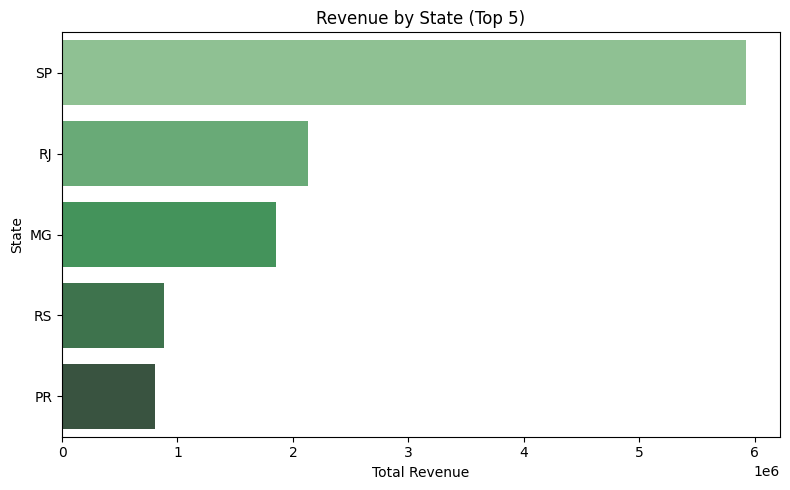

In [4]:
top_states = df.groupby('customer_state')['total_order_value'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_states.values, y=top_states.index, palette='Greens_d')
plt.title("Revenue by State (Top 5)")
plt.xlabel("Total Revenue")
plt.ylabel("State")
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-682909788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_review.values, y=avg_review.index, palette='Purples_r')


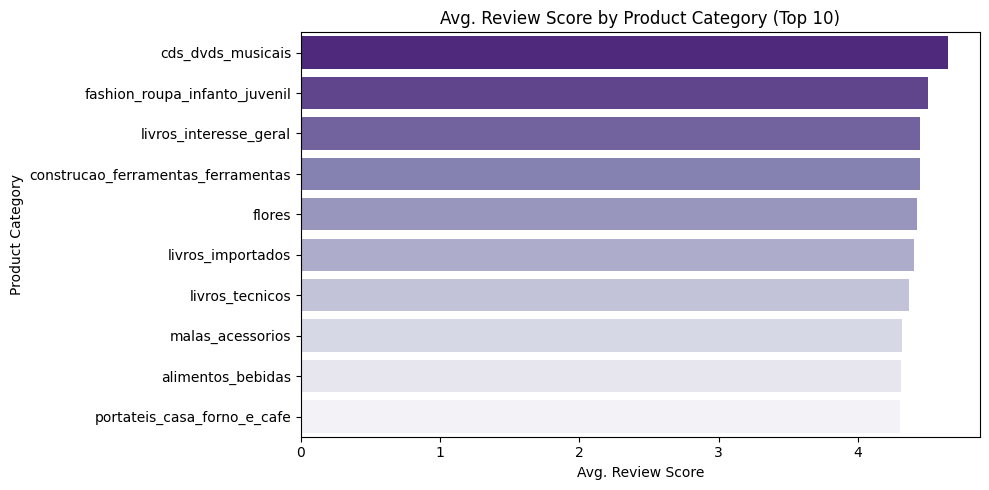

In [5]:
avg_review = df.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_review.values, y=avg_review.index, palette='Purples_r')
plt.title("Avg. Review Score by Product Category (Top 10)")
plt.xlabel("Avg. Review Score")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


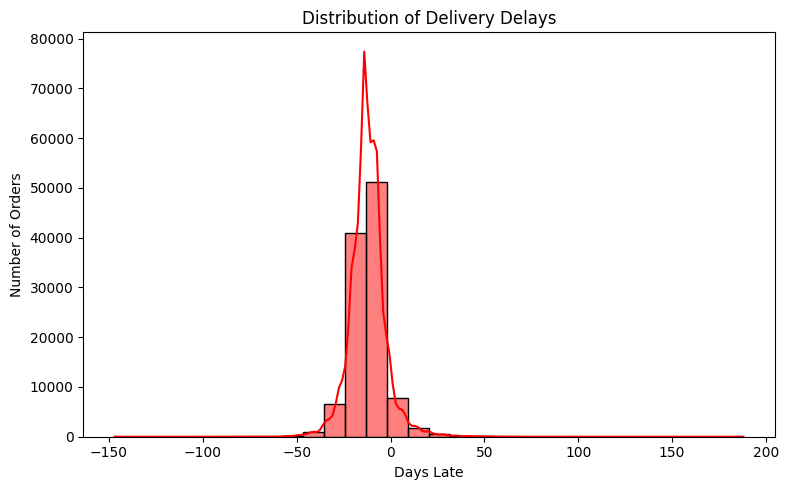

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_delay'].dropna(), bins=30, kde=True, color='red')
plt.title("Distribution of Delivery Delays")
plt.xlabel("Days Late")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


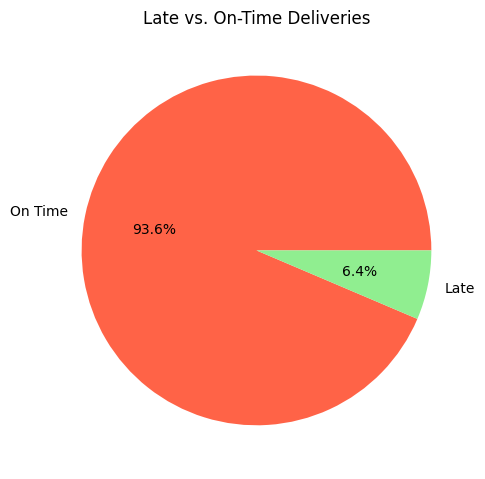

In [8]:
# Create a late/on-time label
df['late_flag'] = df['delivery_delay'].apply(lambda x: 'Late' if x > 0 else 'On Time')

late_counts = df['late_flag'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(late_counts, labels=late_counts.index, autopct='%1.1f%%', colors=['tomato', 'lightgreen'])
plt.title("Late vs. On-Time Deliveries")
plt.tight_layout()
plt.show()


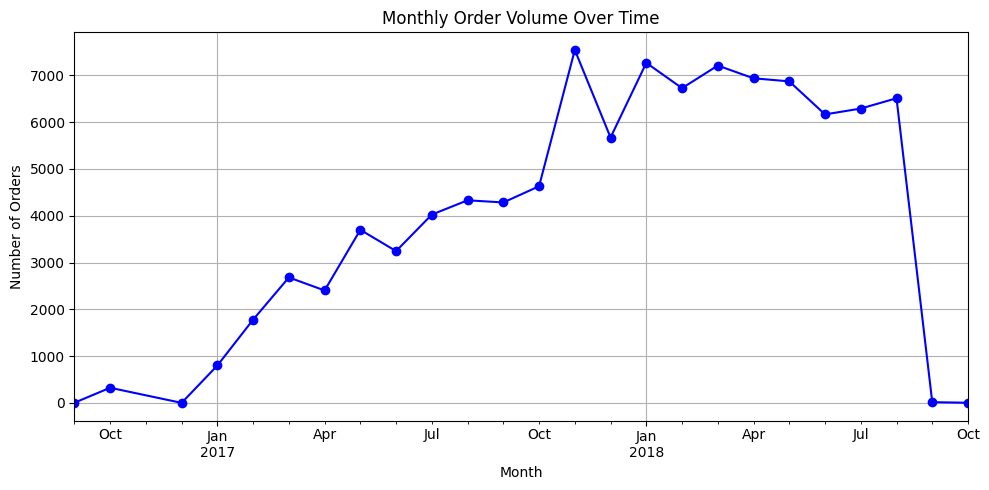

In [9]:
df['order_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M')
monthly_orders = df.groupby('order_month')['order_id'].nunique()

plt.figure(figsize=(10,5))
monthly_orders.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Order Volume Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-10-279850723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aov_by_state.values, y=aov_by_state.index, palette='coolwarm')


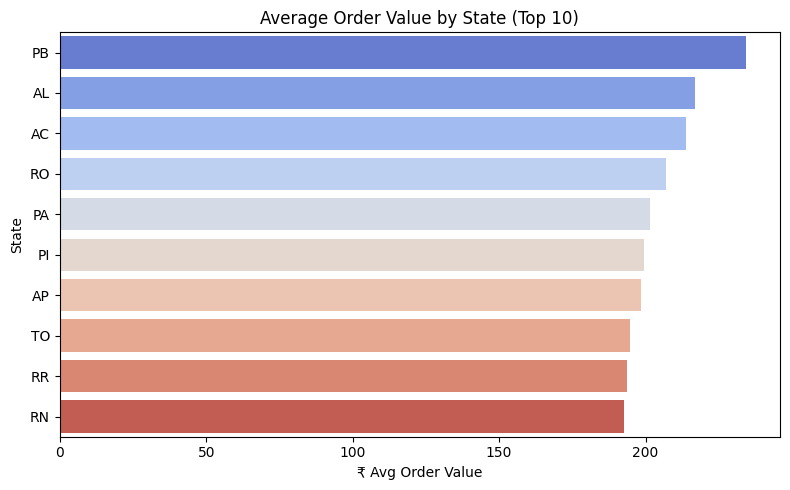

In [10]:
aov_by_state = df.groupby('customer_state')['total_order_value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=aov_by_state.values, y=aov_by_state.index, palette='coolwarm')
plt.title("Average Order Value by State (Top 10)")
plt.xlabel("₹ Avg Order Value")
plt.ylabel("State")
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-1011447662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=df, palette='muted')


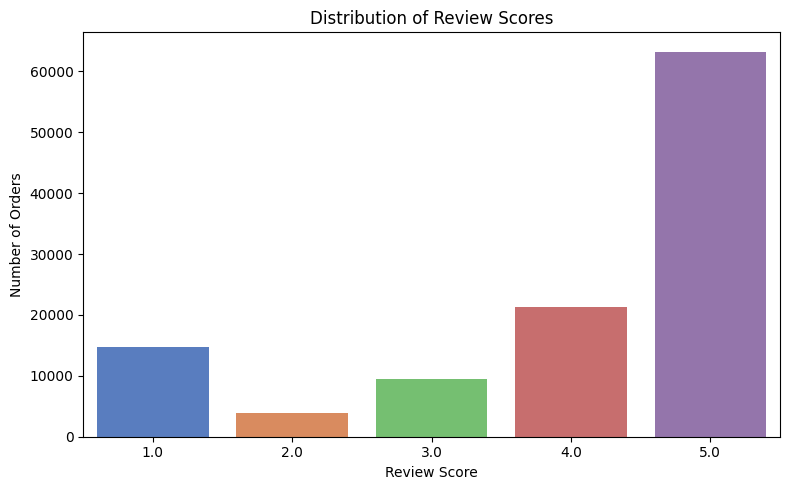

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='review_score', data=df, palette='muted')
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()
